<font size="+5">#01 | Machine Learning & Linear Regression</font>


<div class="alert alert-warning">
  <ul>
      <li>
      Follow the Author on Twitter: <a href="https://twitter.com/jsulopz"><b>@jsulopz</b></a>
    </li>
    <li>
      <b>Python</b> + <b>Data Science</b> Tutorials in ↓
      <ul>
        <li>
          <a href="https://www.youtube.com/c/PythonResolver?sub_confirmation=1"
            >YouTube</a
          >
        </li>
        <li>
          <a href="https://blog.pythonresolver.com/">Blog</a>
        </li>
      </ul>
    </li>
  </ul>
</div>

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/01_Machine%20Learning%20%26%20Linear%20Regression/01_ml-linear-regression_session_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# The starting `object`

- Simply execute the following lines of code to load the data.
- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/

In [1]:
import seaborn as sns #!
import pandas as pd

pd.set_option('display.max_rows', 4)
pd.set_option('display.min_rows', 10)

df = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'total']]
df.rename({'total': 'accidents'}, axis=1, inplace=True)
df.sample(5)

,alcohol,accidents
abbrev,,
AZ,5.208,18.6
CO,3.808,13.6
...,...,...
ME,4.530,15.1
AL,5.640,18.8


# Machine Learning, what does it mean?

> - The Machine Learns...
>
> But, **what does it learn?**

In [2]:
%%HTML
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Machine Learning, what does it mean? ⏯<br><br>· The machine learns...<br><br>Ha ha, not funny! 🤨 What does it learn?<br><br>· A mathematical equation. For example: <a href="https://t.co/sjtq9F2pq7">pic.twitter.com/sjtq9F2pq7</a></p>&mdash; Jesús López (@sotastica) <a href="https://twitter.com/sotastica/status/1449735653328031745?ref_src=twsrc%5Etfw">October 17, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

# How does the Machine Learn?

## In a Linear Regression

<a href="http://www.youtube.com/watch?feature=player_embedded&v=Ht3rYS-JilE" target="_blank">
 <img src="http://img.youtube.com/vi/Ht3rYS-JilE/hqdefault.jpg" alt="Watch the video" width="560" height="315"/>
</a>

## In a Neural Network

<a href="http://www.youtube.com/watch?feature=player_embedded&v=IHZwWFHWa-w?start=36" target="_blank">
 <img src="http://img.youtube.com/vi/IHZwWFHWa-w/hqdefault.jpg" alt="Watch the video" width="560" height="315"/>
</a>

A Practical Example → [Tesla Autopilot](https://www.tesla.com/AI)

An Example where It Fails → [Tesla Confuses Moon with Semaphore](https://twitter.com/Carnage4Life/status/1418920100086784000?s=20)

### Data Visualization to Analyize Patterns

<div class="alert alert-info">
    Will the number of <code>accidents</code> <b>increase</b> if <code>alcohol</code> also increases?
    <br>As the 2 variables are <b>numerical</b>, visualize the data with a <code>scatterplot()</code>.
</div>

In [85]:
import seaborn as sns

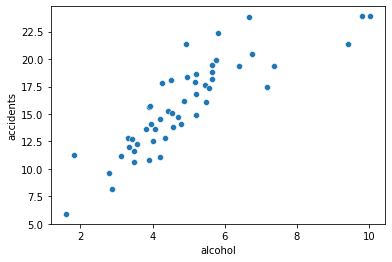

In [86]:
sns.scatterplot(x='alcohol', y='accidents', data=df);

<div class="alert alert-info">
    Draw 3 lines that may represent a reasonable mathematical equation for the historical data
</div>

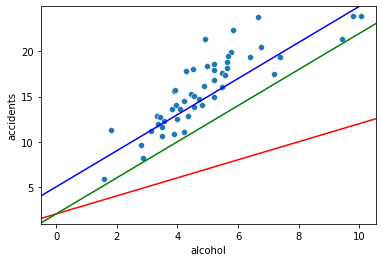

In [87]:
import matplotlib.pyplot as plt #!

sns.scatterplot(x='alcohol', y='accidents', data=df);

# accidents = 2 + 1 * alcohol
plt.axline(xy1=(0, 2), slope=1, color='red')

# accidents = 2 + 2 * alcohol
plt.axline(xy1=(0, 2), slope=2, color='green')

# accidents = 5 + 2 * alcohol
plt.axline(xy1=(0, 5), slope=2, color='blue') ;

<div class="alert alert-danger">
    Understand why Python is not doing what you expect
</div>

- Python is not representing the best line because I am guessing the coefficients of the equation
- We strive to calculate the coefficients with a Python `function()`

# `LinearRegression()` Model in Python

## `fit()` the Model's Mathematical Equation

Apply the [Python Resolver Method](https://gitlab.com/python-resolvers/python-resolver-discipline/-/blob/main/01_Know%20How/01_Resolving%20Python%20Method.md) to solve problems

<div class="alert alert-success">
    <b>Step 1.</b> The <b>starting <code>object</code></b>
</div>

In [88]:
df

,alcohol,accidents
abbrev,,
AL,5.640,18.8
AK,4.525,18.1
...,...,...
WI,4.554,13.8
WY,5.568,17.4


<div class="alert alert-success">
    <b>Step 2.</b> Sketch the result
</div>

$$
accidents = 5 + 2 \cdot alcohol
$$

<div class="alert alert-success">
    <b>Step 3.</b> Look for the <code>function()</code> to obtain the result
</div>

In [89]:
df.fit

AttributeError: 'DataFrame' object has no attribute 'fit'

In [90]:
import pandas as pd

In [91]:
pd.fit

AttributeError: module 'pandas' has no attribute 'fit'

<div class="alert alert-success">
    Time to use Google
</div>

![](<src/python linear regression - Google Search.png>)

![](<src/01 Linear Regression in Python – Real Python.png>)

![](<src/02 Linear Regression in Python – Real Python.png>)

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
model = LinearRegression()

In [94]:
model.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate Variables for the Model

Regarding their role:

1. **Target Variable `y`**

> Also known as ↓
>
> explanatory ~ features ~ independent variables

<div class="alert alert-info">
    What would you like <b>to predict</b>?
    <br>Total number of accients? Or Alcohol?
</div>

In [95]:
target = df['accidents']

2. **Explanatory Variable `X`**

> Also known as ↓
>
> y ~ target ~ class ~ label ~ dependent variables

<div class="alert alert-info">
    Which variable will you use <b>to explain</b> the target?
</div>

In [96]:
explanatory = df[['alcohol']]

### Finally `fit()` the Model

In [97]:
model.fit(X=explanatory, y=target)

LinearRegression()

### Model's Mathematical Equation

A model is nothing more than a mathematical equation that **helps you to calculate** something. For example:

1. **Churn**: which is the probability for this client not to buy me anymore?
2. **Credit Approval**: which is the probability for this client to pay the credit?
3. **Athlete's Injury**: which is the probability for this athlete to have an injury in the next game?
4. **Car Rental**: how many cars will people rent tomorrow?

For our case: **how many accidents** the State will have (based on alcohol)?

<div class="alert alert-info">
    Which is the mathematical equation?
</div>

![](<src/03 Linear Regression in Python – Real Python.png>)

In [98]:
model.intercept_

5.8577761548263005

In [99]:
model.coef_

array([2.0325063])

$$
accidents = 5.85 + 2.03 \cdot alcohol
$$

In [100]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 '_residues': 231.96888653310057,
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.8577761548263005}

## Model Interpretation

<div class="alert alert-info">
    How many accidents will happen for every <b>one unit increase in alcohol?</b>
</div>

- 1 unit increase on alcohol will increase the total number of accidents in 2.03 units

## Source Code Execution

<div class="alert alert-info">
    What have happened <b>inside the computer</b> to get the model equation?
</div>

In [101]:
import inspect

In [102]:
print(inspect.getsourcefile(element.fit))

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_base.py


In [103]:
print(inspect.getsource(element.fit))

    def fit(self, X, y, sample_weight=None):
        """
        Fit linear model.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Training data.

        y : array-like of shape (n_samples,) or (n_samples, n_targets)
            Target values. Will be cast to X's dtype if necessary.

        sample_weight : array-like of shape (n_samples,), default=None
            Individual weights for each sample.

            .. versionadded:: 0.17
               parameter *sample_weight* support to LinearRegression.

        Returns
        -------
        self : object
            Fitted Estimator.
        """

        _normalize = _deprecate_normalize(
            self.normalize, default=False, estimator_name=self.__class__.__name__
        )

        n_jobs_ = self.n_jobs

        accept_sparse = False if self.positive else ["csr", "csc", "coo"]

        X, y = self._validate_data(
            X, y, accept_sparse=accep

## Calculate Predictions

<div class="alert alert-info">
    Which <code>function()</code> can we use to calculate the predictions?
    <br>How can you answer on your own; <b>without searching in Google</b>?
</div>

<div class="alert alert-success">
    <b>Step 1.</b> The <b>starting <code>object</code></b>
</div>

In [104]:
model

LinearRegression()

<div class="alert alert-success">
    <b>Step 2.</b> Sketch the result
</div>

<div class="alert alert-success">
    <b>Step 3.</b> Look for the <code>function()</code> to obtain the result
</div>

In [105]:
model.predict(X=explanatory)

array([17.32111171, 15.05486718, 16.44306899, 17.69509287, 12.68699734,
       13.59756016, 13.76016066, 15.73575679,  9.0955587 , 16.40851638,
       13.78455074, 20.44100889, 14.87600663, 14.70324359, 14.40446516,
       13.8353634 , 14.54064309, 15.86177218, 19.6076813 , 15.06502971,
       13.98780137, 11.69106925, 13.88211104, 11.5162737 , 16.94713055,
       16.98371566, 24.99585551, 16.45729653, 15.41868581, 12.93089809,
       12.23171592, 15.95526747, 13.10772614, 16.44306899, 26.26007443,
       15.60161138, 17.58737003, 12.62195713, 17.32517672, 14.43088774,
       25.77430543, 18.86988151, 17.3515993 , 20.84141263,  9.53254755,
       14.15040187, 12.82724027, 12.96748321, 19.40239816, 15.11380986,
       17.17477126])

In [106]:
predictions = model.predict(X=explanatory)

## Model Visualization

<div class="alert alert-info">
    <ol>
        <li>What would happend if you <b>plot the predictions</b>?</li>
        <li>And the <b>real data</b>?</li>
    </ol>
</div>

In [107]:
df['pred'] = predictions

In [110]:
df #!

,alcohol,accidents,pred
abbrev,,,
AL,5.640,18.8,17.321112
AK,4.525,18.1,15.054867
...,...,...,...
WI,4.554,13.8,15.113810
WY,5.568,17.4,17.174771


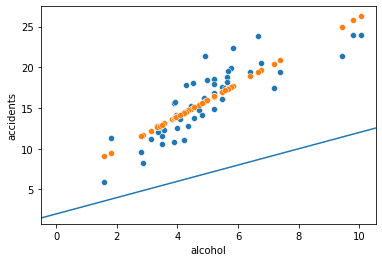

In [111]:
sns.scatterplot(x='alcohol', y='accidents', data=df); #!
sns.scatterplot(x='alcohol', y='pred', data=df);

plt.axline(xy1=(0, 2), slope=1);

<div class="alert alert-info">
    Plot the line of the Linear Regression model as well
</div>

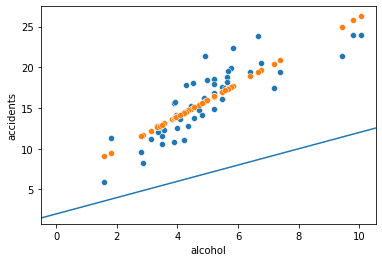

In [112]:
sns.scatterplot(x='alcohol', y='accidents', data=df); #!
sns.scatterplot(x='alcohol', y='pred', data=df);

plt.axline(xy1=(0, 2), slope=1);

# How good is my model? **Goodness of Fit**

<div class="alert alert-info">
    How can we compare <b>reality vs. predictions</b>?
</div>

<div class="alert alert-success">
    <b>Step 1.</b> The <b>starting <code>object</code></b>
</div>

In [152]:
model

LinearRegression()

Apply the [Python Resolver Method](https://gitlab.com/python-resolvers/python-resolver-discipline/-/blob/main/01_Know%20How/01_Resolving%20Python%20Method.md) to solve problems

<div class="alert alert-success">
    <b>Step 2.</b> Sketch the result
</div>

<div class="alert alert-success">
    <b>Step 3.</b> Look for the <code>function()</code> to obtain the result
</div>

In [153]:
model.score(X=explanatory, y=target)

0.7269492966665405

<div class="alert alert-info">
    How can we calculate it step by step <b>(by hand)</b>?
</div>

In [154]:
df.accidents - df.pred

abbrev
AL    1.478888
AK    3.045133
        ...   
WI   -1.313810
WY    0.225229
Length: 51, dtype: float64

In [155]:
df['error'] = df.accidents - df.pred

In [115]:
df #!

,alcohol,accidents,pred,error
abbrev,,,,
AL,5.640,18.8,17.321112,1.478888
AK,4.525,18.1,15.054867,3.045133
...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810
WY,5.568,17.4,17.174771,0.225229


In [116]:
df.error.sum() #!

1.7053025658242404e-13

In [117]:
df.error.sum().round(2) #!

0.0

<div class="alert alert-danger">
    Understand why Python is not doing what you expect
</div>

- The error is added up to 0 because negative differences counteract the positive ones

In [118]:
df #!

,alcohol,accidents,pred,error
abbrev,,,,
AL,5.640,18.8,17.321112,1.478888
AK,4.525,18.1,15.054867,3.045133
...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810
WY,5.568,17.4,17.174771,0.225229


<div class="alert alert-info">
    How do you neutralize this effect?
</div>

In [119]:
df.error**2

abbrev
AL    2.187111
AK    9.272834
        ...   
WI    1.726096
WY    0.050728
Name: error, Length: 51, dtype: float64

In [120]:
df['error2'] = df.error**2

In [121]:
df

,alcohol,accidents,pred,error,error2
abbrev,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111
AK,4.525,18.1,15.054867,3.045133,9.272834
...,...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810,1.726096
WY,5.568,17.4,17.174771,0.225229,0.050728


In [122]:
rss = df.error2.sum()

In [123]:
rss

231.96888653310063

<div class="alert alert-info">
    What is the meaning of this value?
</div>

<div class="alert alert-info">
    Which other metric would you use to compare the previous value? How do you measure the possible error of the model?
</div>

- As the model aims to predict the number of accidents...

In [125]:
df.accidents

abbrev
AL    18.8
AK    18.1
      ... 
WI    13.8
WY    17.4
Name: accidents, Length: 51, dtype: float64

- We should calculate the variation of the number of accidents to compare it with the variation of the model

In [128]:
df.accidents.mean()

15.79019607843137

In [129]:
df.accidents - df.accidents.mean()

abbrev
AL    3.009804
AK    2.309804
        ...   
WI   -1.990196
WY    1.609804
Name: accidents, Length: 51, dtype: float64

In [136]:
df['target_error'] = df.accidents - df.accidents.mean()

In [137]:
df

,alcohol,accidents,pred,error,error2,error_var,mean_diff,target_error
abbrev,,,,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111,3.009804,3.009804,3.009804
AK,4.525,18.1,15.054867,3.045133,9.272834,2.309804,2.309804,2.309804
...,...,...,...,...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810,1.726096,-1.990196,-1.990196,-1.990196
WY,5.568,17.4,17.174771,0.225229,0.050728,1.609804,1.609804,1.609804


In [139]:
df['target_error']**2

abbrev
AL    9.058920
AK    5.335194
        ...   
WI    3.960880
WY    2.591469
Name: target_error, Length: 51, dtype: float64

In [140]:
df['target_error2'] = df['target_error']**2

In [141]:
df

,alcohol,accidents,pred,error,error2,error_var,mean_diff,target_error,target_error2
abbrev,,,,,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111,3.009804,3.009804,3.009804,9.058920
AK,4.525,18.1,15.054867,3.045133,9.272834,2.309804,2.309804,2.309804,5.335194
...,...,...,...,...,...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810,1.726096,-1.990196,-1.990196,-1.990196,3.960880
WY,5.568,17.4,17.174771,0.225229,0.050728,1.609804,1.609804,1.609804,2.591469


In [142]:
df['target_error2'].sum()

849.5450980392156

<div class="alert alert-info">
    How could you measure the model's percentage error compared to the real data error?
</div>

In [147]:
tss = df['target_error2'].sum()

In [148]:
rss

231.96888653310063

- The following is the percentage of failure of the model

In [149]:
rss/tss

0.2730507033334595

- Whereas next we have the percentage of success of the model

In [150]:
1 - rss/tss

0.7269492966665405

# Other Regression Models to Calculate Accidents

> Tutorial → [Why All Machine Learning Models Are the Same](https://blogsotastico.com/why-all-machine-learning-models-are-the-same)

## `RandomForestRegression()`

### Calculate Mathematical Equation

In [157]:
from sklearn.ensemble import RandomForestRegressor

In [158]:
model_rf = RandomForestRegressor()

In [159]:
model_rf.fit(X=explanatory, y=target)

RandomForestRegressor()

### Calculate Predictions

In [161]:
df['pred_rf'] = model_rf.predict(X=explanatory) #!

## `SVR()`

### Calculate Mathematical Equation

In [162]:
from sklearn.svm import SVR

In [163]:
model_sv = SVR()

In [164]:
model_sv.fit(X=explanatory, y=target)

SVR()

### Calculate Predictions

In [165]:
df['pred_sv'] = model_sv.predict(X=explanatory)

In [170]:
df.filter(regex='pred|acci') #!

,accidents,pred,pred_rf,pred_sv
abbrev,,,,
AL,18.8,17.321112,18.635,18.295708
AK,18.1,15.054867,16.819,15.184627
...,...,...,...,...
WI,13.8,15.113810,14.600,15.273977
WY,17.4,17.174771,17.928,18.135725


# Visualize & Choose the Best Model

> - Which model is the best?
> - Is there any **metric to compare** these models?
> - Which is the metric?
> - Get the metric for each model

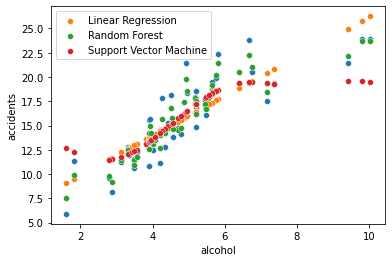

In [171]:
sns.scatterplot(x='alcohol', y='accidents', data=df); #!
sns.scatterplot(x='alcohol', y='pred', data=df, label='Linear Regression');
sns.scatterplot(x='alcohol', y='pred_rf', data=df, label='Random Forest');
sns.scatterplot(x='alcohol', y='pred_sv', data=df, label='Support Vector Machine');

In [172]:
element.score(X=explanatory, y=target)

0.7269492966665405

In [174]:
model_rf.score(X=explanatory, y=target)

0.9526937019438314

In [175]:
model_sv.score(X=explanatory, y=target)

0.7083438012012769

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.